<a href="https://colab.research.google.com/github/cerensenol/DSA-210-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving path_to_crime_dataset.csv to path_to_crime_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("path_to_crime_dataset.csv")

df['Facilities_per_100k'] = (df['FacilitiesCount'] / df['Population']) * 100000
df['MHClient_per_100k'] = (df['MHClients'] / df['Population']) * 100000
df['Log_CrimeRate'] = np.log(df['ViolentCrimePer100k'])

df.head()

,State,AMI%,SMI%,DrugUse%,ViolentCrimePer100k,FacilitiesCount,MHClients,Population,Facilities_per_100k,MHClient_per_100k,Log_CrimeRate
0,Alaska,25.2,6.8,17.5,837,54,6000,733391,7.363057,818.117484,6.729824
1,California,20.5,4.8,15.0,442,630,50000,39538223,1.593395,126.459907,6.091310
2,Florida,19.3,4.1,14.2,384,420,43000,21538187,1.950025,199.645402,5.950643
3,New Mexico,22.1,5.6,18.9,778,73,7800,2117522,3.447426,368.355087,6.656727
4,Oregon,26.7,7.2,19.1,292,110,10500,4237256,2.596020,247.801879,5.676754


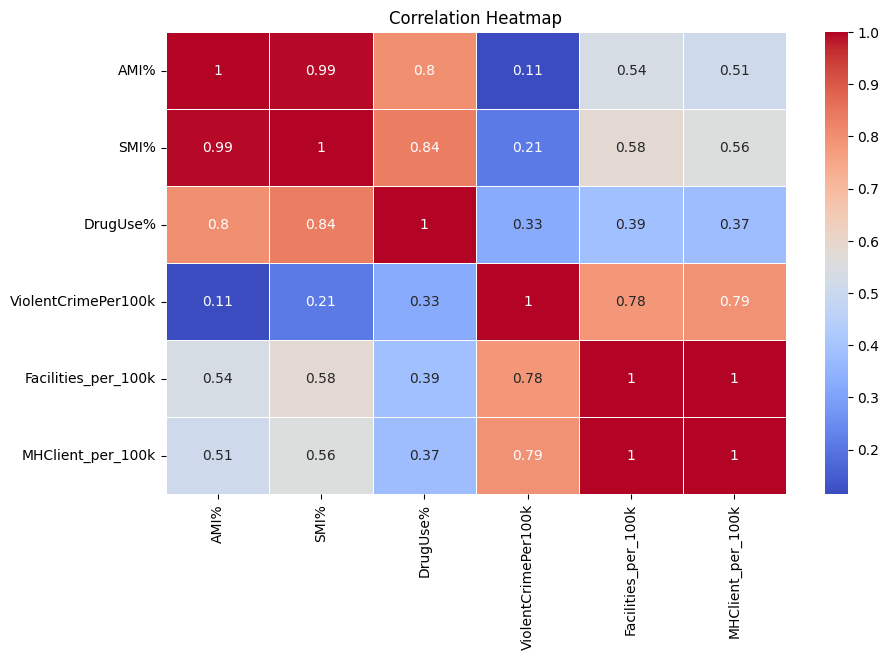

In [3]:
plt.figure(figsize=(10, 6))
corr = df[['AMI%', 'SMI%', 'DrugUse%', 'ViolentCrimePer100k', 'Facilities_per_100k', 'MHClient_per_100k']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

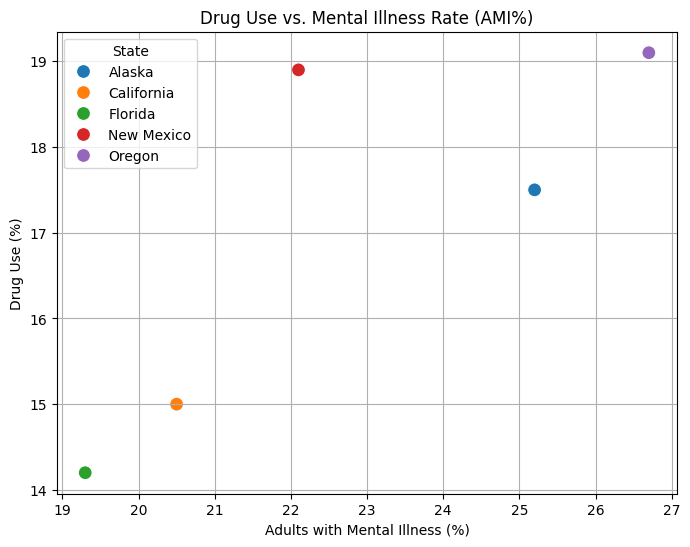

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AMI%', y='DrugUse%', hue='State', s=100)
plt.title('Drug Use vs. Mental Illness Rate (AMI%)')
plt.xlabel('Adults with Mental Illness (%)')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.show()

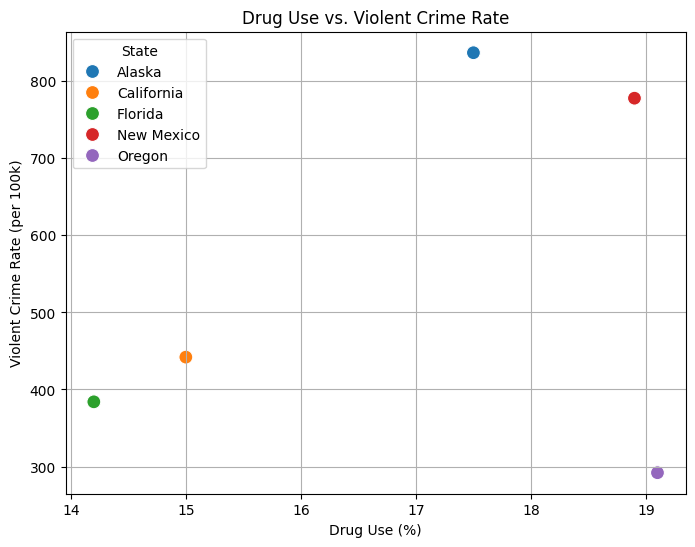

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DrugUse%', y='ViolentCrimePer100k', hue='State', s=100)
plt.title('Drug Use vs. Violent Crime Rate')
plt.xlabel('Drug Use (%)')
plt.ylabel('Violent Crime Rate (per 100k)')
plt.grid(True)
plt.show()

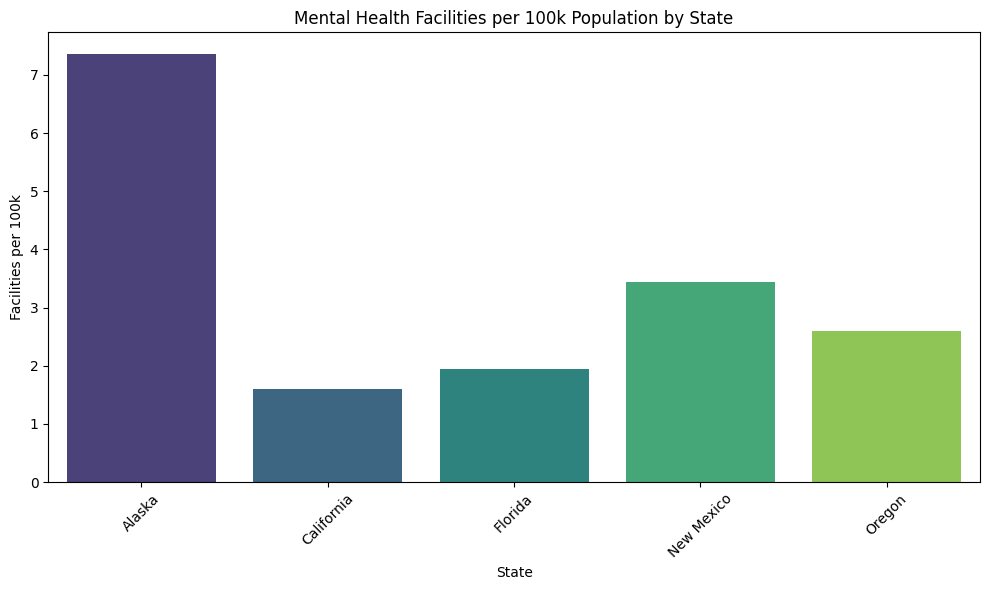

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Facilities_per_100k', data=df, hue='State', palette='viridis', dodge=False, legend=False)
plt.title('Mental Health Facilities per 100k Population by State')
plt.xlabel('State')
plt.ylabel('Facilities per 100k')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Hypothesis 1: Higher rates of undiagnosed mental illnesses are connected with increased use of drugs and this in turn contributes to higher crime rates.

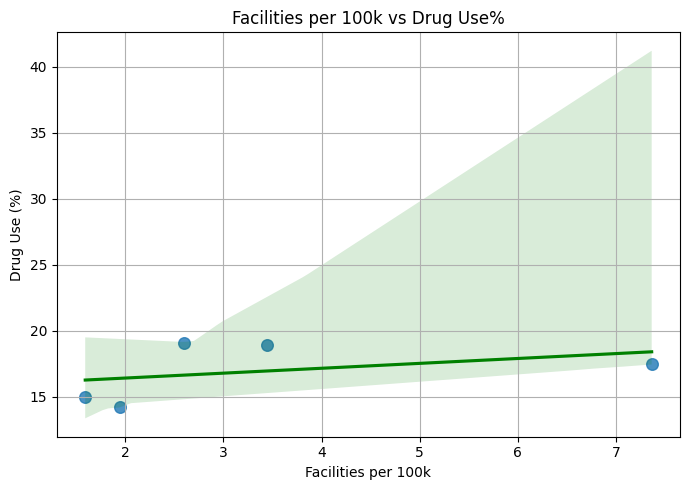

In [7]:
plt.figure(figsize=(7, 5))
sns.regplot(x='Facilities_per_100k', y='DrugUse%', data=df, scatter_kws={"s": 70}, line_kws={"color": "green"})
plt.title('Facilities per 100k vs Drug Use%')
plt.xlabel('Facilities per 100k')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

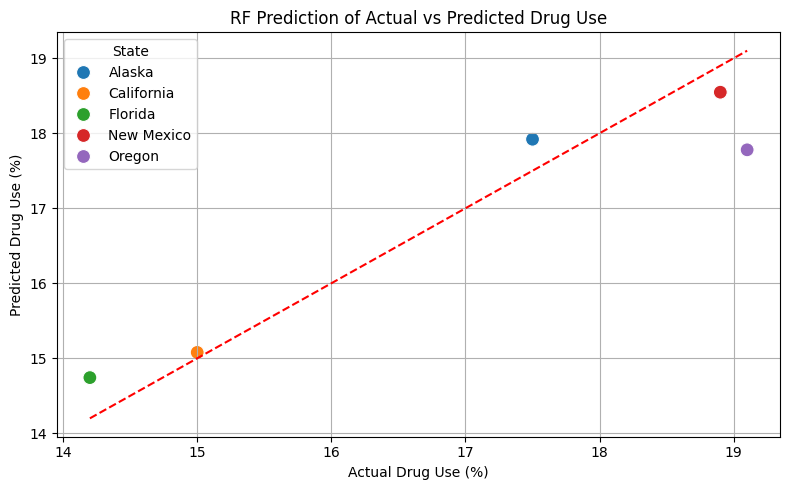

In [28]:
from sklearn.ensemble import RandomForestRegressor

X1 = df[['Facilities_per_100k']]
y1 = df['DrugUse%']

rf1 = RandomForestRegressor(random_state=42)
rf1.fit(X1, y1)

df['PredictedDrugUse_RF'] = rf1.predict(X1)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y1, y=df['PredictedDrugUse_RF'], hue=df['State'], s=100)
plt.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'r--')
plt.title("RF Prediction of Actual vs Predicted Drug Use")
plt.xlabel("Actual Drug Use (%)")
plt.ylabel("Predicted Drug Use (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
importances_h1 = rf1.feature_importances_

print(f"Feature Importance (Facilities_per_100k): {importances_h1[0]:.2f}")

Feature Importance (Facilities_per_100k): 1.00


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse_h1 = mean_squared_error(y1, df['PredictedDrugUse_RF'])
r2_h1 = r2_score(y1, df['PredictedDrugUse_RF'])

print(f"Hypothesis 1 - MSE: {mse_h1:.2f}")
print(f"Hypothesis 1 - R²: {r2_h1:.2f}")

Hypothesis 1 - MSE: 0.47
Hypothesis 1 - R²: 0.88


In [17]:
# Hypothesis 2: Areas with limited access to mental health services have significantly higher drug use rates.

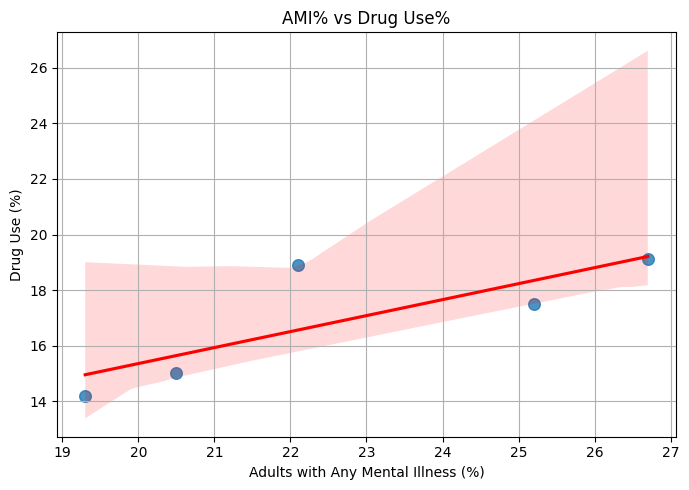

In [10]:
plt.figure(figsize=(7, 5))
sns.regplot(x='AMI%', y='DrugUse%', data=df, scatter_kws={"s": 70}, line_kws={"color": "red"})
plt.title('AMI% vs Drug Use%')
plt.xlabel('Adults with Any Mental Illness (%)')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

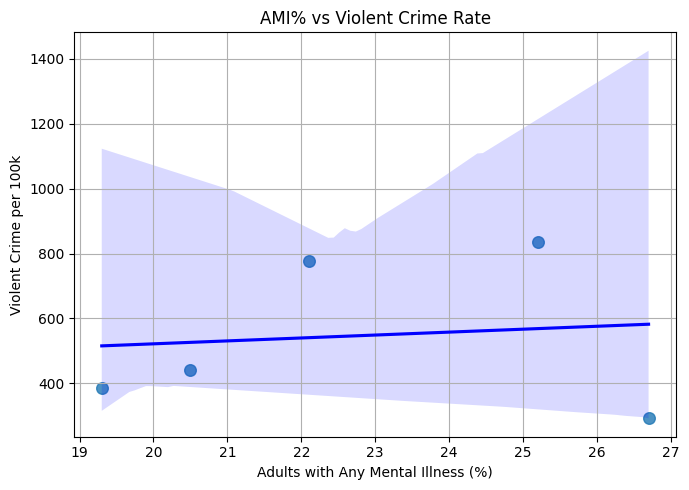

In [11]:
plt.figure(figsize=(7, 5))
sns.regplot(x='AMI%', y='ViolentCrimePer100k', data=df, scatter_kws={"s": 70}, line_kws={"color": "blue"})
plt.title('AMI% vs Violent Crime Rate')
plt.xlabel('Adults with Any Mental Illness (%)')
plt.ylabel('Violent Crime per 100k')
plt.grid(True)
plt.tight_layout()
plt.show()

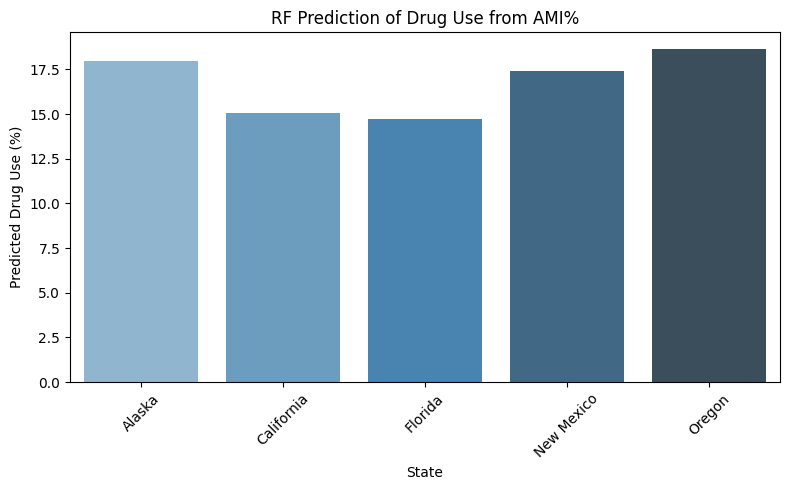

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x='State', y='PredictedDrugUse_AMI_RF', data=df, hue='State', palette='Blues_d', dodge=False, legend=False)
plt.title("RF Prediction of Drug Use from AMI%")
plt.ylabel("Predicted Drug Use (%)")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
X2 = df[['AMI%']]
y2 = df['DrugUse%']

rf2 = RandomForestRegressor(random_state=42)
rf2.fit(X2, y2)

df['PredictedDrugUse_AMI_RF'] = rf2.predict(X2)

In [22]:
importances_h2 = rf2.feature_importances_
print(f"Feature Importance (AMI%): {importances_h2[0]:.2f}")

Feature Importance (AMI%): 1.00


In [23]:
mse_h2 = mean_squared_error(y2, df['PredictedDrugUse_AMI_RF'])
r2_h2 = r2_score(y2, df['PredictedDrugUse_AMI_RF'])

print(f"Hypothesis 2 - MSE: {mse_h2:.2f}")
print(f"Hypothesis 2 - R²: {r2_h2:.2f}")

Hypothesis 2 - MSE: 0.57
Hypothesis 2 - R²: 0.86


In [18]:
# Hypothesis 3: Individuals with severe, untreated mental health conditions are more likely to engage in criminal activity.

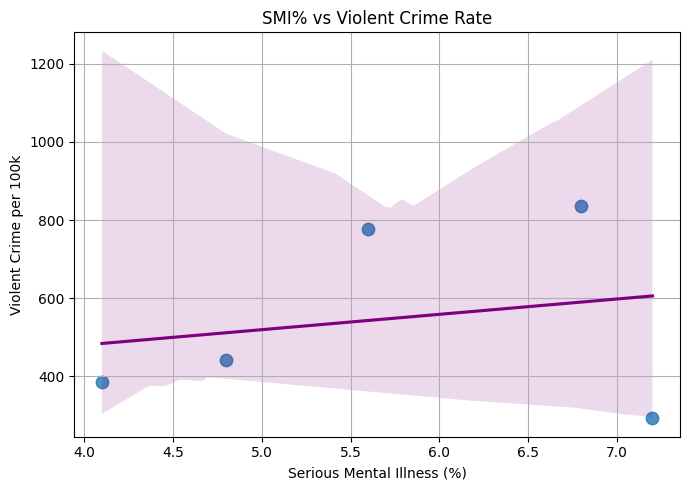

In [14]:
plt.figure(figsize=(7, 5))
sns.regplot(x='SMI%', y='ViolentCrimePer100k', data=df, scatter_kws={"s": 80}, line_kws={"color": "purple"})
plt.title('SMI% vs Violent Crime Rate')
plt.xlabel('Serious Mental Illness (%)')
plt.ylabel('Violent Crime per 100k')
plt.grid(True)
plt.tight_layout()
plt.show()

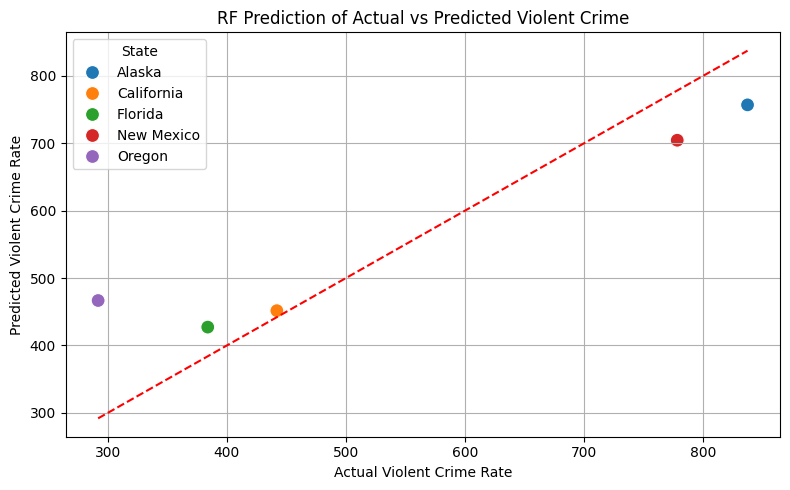

In [29]:
X3 = df[['SMI%', 'DrugUse%']]
y3 = df['ViolentCrimePer100k']

rf3 = RandomForestRegressor(random_state=42)
rf3.fit(X3, y3)

df['PredictedCrime_RF'] = rf3.predict(X3)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y3, y=df['PredictedCrime_RF'], hue=df['State'], s=100)
plt.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'r--')
plt.title("RF Prediction of Actual vs Predicted Violent Crime")
plt.xlabel("Actual Violent Crime Rate")
plt.ylabel("Predicted Violent Crime Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
importances_h3 = rf3.feature_importances_
for feat, imp in zip(X3.columns, importances_h3):
    print(f"Feature Importance ({feat}): {imp:.2f}")

Feature Importance (SMI%): 0.51
Feature Importance (DrugUse%): 0.49


In [25]:
mse_h3 = mean_squared_error(y3, df['PredictedCrime_RF'])
r2_h3 = r2_score(y3, df['PredictedCrime_RF'])

print(f"Hypothesis 3 - MSE: {mse_h3:.2f}")
print(f"Hypothesis 3 - R²: {r2_h3:.2f}")

Hypothesis 3 - MSE: 8871.34
Hypothesis 3 - R²: 0.82


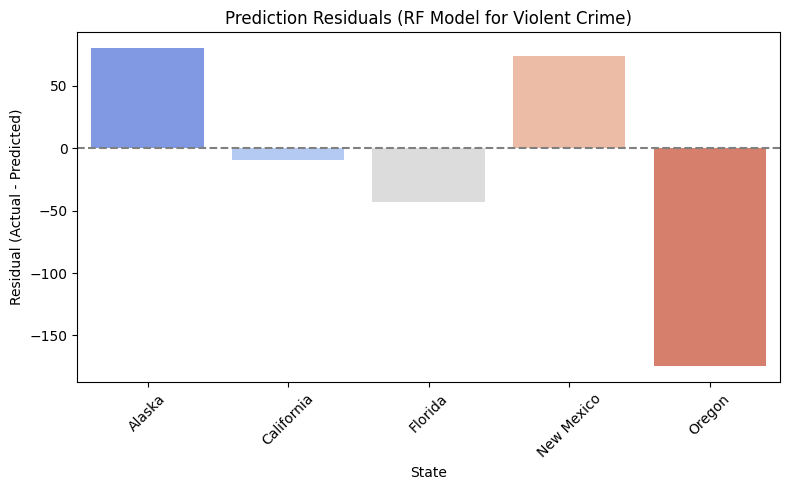

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x='State', y='Residuals_h3', hue='State', data=df, palette='coolwarm', dodge=False, legend=False)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Prediction Residuals (RF Model for Violent Crime)")
plt.ylabel("Residual (Actual - Predicted)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()